In [1]:
from matplotlib.colors import Normalize
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import cm
from utils import path_to_dict

path = 'results/alpha=1.0,batch_size=125,depth=0,diff=0.0,diff_type=random,epochs=200,l2=0.0,lr=0.02,mom=0.0,task=cifar10_resnet18,track_accs=True,width=0'

d = pd.read_pickle(os.path.join(path, 'log.pkl'))

In [2]:
# path_fork = 'results/alpha=1.0,batch_size=125,depth=0,diff=0.0,diff_type=random,epochs=200,l2=0.0,lr=0.02,mom=0.0,task=cifar10_resnet18,track_accs=True,width=0/children/checkpoint_10_0/alpha=10.0,batch_size=125,depth=0,diff=0.0,diff_type=random,epochs=30,fork=True,l2=0.0,lr=0.02,mom=0.0,task=cifar10_resnet18,track_accs=True,width=0/'
path_fork = 'results/alpha=1.0,batch_size=125,depth=0,diff=0.0,diff_type=random,epochs=200,l2=0.0,lr=0.02,mom=0.0,task=cifar10_resnet18,track_accs=True,width=0/children/checkpoint_10_0/alpha=100.0,batch_size=125,depth=0,diff=0.0,diff_type=random,epochs=60,fork=True,l2=0.0,lr=0.02,mom=0.0,task=cifar10_resnet18,track_accs=True,width=0/'
# path_fork = 'results/alpha=1.0,batch_size=125,depth=0,diff=0.0,diff_type=random,epochs=200,l2=0.0,lr=0.02,mom=0.0,task=cifar10_resnet18,track_accs=True,width=0/children/checkpoint_30_800/alpha=10.0,batch_size=125,depth=0,diff=0.0,diff_type=random,epochs=30,fork=True,l2=0.0,lr=0.02,mom=0.0,task=cifar10_resnet18,track_accs=True,width=0/'
# path_fork = 'results/alpha=1.0,batch_size=125,depth=0,diff=0.0,diff_type=random,epochs=200,l2=0.0,lr=0.02,mom=0.0,task=cifar10_resnet18,track_accs=True,width=0/children/checkpoint_50_2800/alpha=10.0,batch_size=125,depth=0,diff=0.0,diff_type=random,epochs=30,fork=True,l2=0.0,lr=0.02,mom=0.0,task=cifar10_resnet18,track_accs=True,width=0/'
# path_fork = 'results/alpha=1.0,batch_size=125,depth=0,diff=0.0,diff_type=random,epochs=200,l2=0.0,lr=0.02,mom=0.0,task=cifar10_resnet18,track_accs=True,width=0/children/checkpoint_70_6800/alpha=10.0,batch_size=125,depth=0,diff=0.0,diff_type=random,epochs=30,fork=True,l2=0.0,lr=0.02,mom=0.0,task=cifar10_resnet18,track_accs=True,width=0/'
# path_fork = 'results/alpha=1.0,batch_size=125,depth=0,diff=0.0,diff_type=random,epochs=200,l2=0.0,lr=0.02,mom=0.0,task=cifar10_resnet18,track_accs=True,width=0/children/checkpoint_75_8400/alpha=10.0,batch_size=125,depth=0,diff=0.0,diff_type=random,epochs=30,fork=True,l2=0.0,lr=0.02,mom=0.0,task=cifar10_resnet18,track_accs=True,width=0/'
# path_fork = 'results/alpha=1.0,batch_size=125,depth=0,diff=0.0,diff_type=random,epochs=200,l2=0.0,lr=0.02,mom=0.0,task=cifar10_resnet18,track_accs=True,width=0/children/checkpoint_80_10000/alpha=10.0,batch_size=125,depth=0,diff=0.0,diff_type=random,epochs=30,fork=True,l2=0.0,lr=0.02,mom=0.0,task=cifar10_resnet18,track_accs=True,width=0/'
# path_fork = 'results/alpha=1.0,batch_size=125,depth=0,diff=0.0,diff_type=random,epochs=200,l2=0.0,lr=0.02,mom=0.0,task=cifar10_resnet18,track_accs=True,width=0/children/checkpoint_80_10000/alpha=100.0,batch_size=125,depth=0,diff=0.0,diff_type=random,epochs=30,fork=True,l2=0.0,lr=0.02,mom=0.0,task=cifar10_resnet18,track_accs=True,width=0/'
d_fork = pd.read_pickle(os.path.join(path_fork, 'log.pkl'))

checkpoint_name = path_fork.split('/')[3]

In [3]:
def concatenate_acc_loss(d):
    accs = []
    losses = []
    for i, r in d.iterrows():
        accs.append(r['train_accs'])
        losses.append(r['train_losses'])

    accs = np.array(accs)
    losses = np.array(losses)

    return accs, losses

accs, losses = concatenate_acc_loss(d)

In [4]:
accs_fork = []
losses_fork = []
for i, r in d_fork.iterrows():
    losses_fork.append(r['train_losses'])
    accs_fork.append(r['train_accs'])

accs_fork = np.array(accs_fork)
losses_fork = np.array(losses_fork)

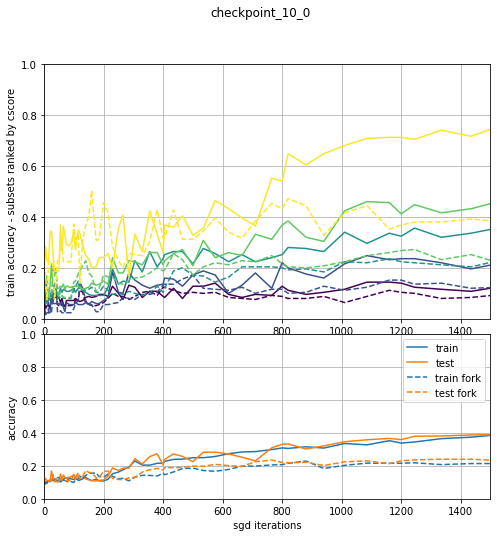

In [5]:
# xlims = (0, 20000)
xlims = (0, 1500)

plt.figure(figsize=(8, 8))
plt.suptitle(checkpoint_name)
plt.subplot2grid((5, 1), (0, 0), rowspan=3)
cmap = cm.viridis(np.linspace(0, 1, 5))
for i in range(5):
    plt.plot(d['iteration'], accs[:, i], color=cmap[i])
    plt.plot(d_fork['iteration'], accs_fork[:, i], '--', color=cmap[i])
# plt.xscale('log')
plt.xlim(*xlims)
plt.ylabel('train accuracy - subsets ranked by cscore')
plt.ylim(0, 1)
plt.grid()

plt.subplot2grid((5, 1), (3, 0), rowspan=2)
axis_train = plt.plot(d['iteration'], d['train_acc'], label='train')
axis_test = plt.plot(d['iteration'], d['test_acc'], label='test')
plt.plot(d_fork['iteration'], d_fork['train_acc'], '--', label='train fork', color=axis_train[0].get_color())
plt.plot(d_fork['iteration'], d_fork['test_acc'], '--', label='test fork', color=axis_test[0].get_color())
plt.legend()
# plt.xscale('log')
plt.xlim(*xlims)
plt.xlabel('sgd iterations')
plt.ylabel('accuracy')
plt.ylim(0, 1)
plt.grid()
plt.savefig('figures/acc_bins.pdf')
plt.show()

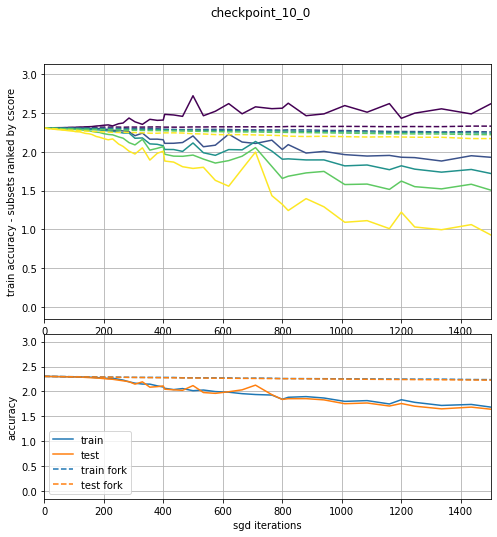

In [6]:
xlims = (0, 1500)

plt.figure(figsize=(8, 8))
plt.suptitle(checkpoint_name)
plt.subplot2grid((5, 1), (0, 0), rowspan=3)
cmap = cm.viridis(np.linspace(0, 1, 5))
for i in range(5):
    plt.plot(d['iteration'], losses[:, i], color=cmap[i])
    plt.plot(d_fork['iteration'], losses_fork[:, i], '--', color=cmap[i])
# plt.xscale('log')
plt.xlim(*xlims)
plt.ylabel('train accuracy - subsets ranked by cscore')
# plt.ylim(0, 1)
plt.grid()

plt.subplot2grid((5, 1), (3, 0), rowspan=2)
axis_train = plt.plot(d['iteration'], d['train_loss'], label='train')
axis_test = plt.plot(d['iteration'], d['test_loss'], label='test')
plt.plot(d_fork['iteration'], d_fork['train_loss'], '--', label='train fork', color=axis_train[0].get_color())
plt.plot(d_fork['iteration'], d_fork['test_loss'], '--', label='test fork', color=axis_test[0].get_color())
plt.legend()
# plt.xscale('log')
plt.xlim(*xlims)
plt.xlabel('sgd iterations')
plt.ylabel('accuracy')
# plt.ylim(0, 1)
plt.grid()
plt.savefig('figures/acc_bins.pdf')
plt.show()

In [7]:
cummin = np.minimum.accumulate

In [8]:
def plot_vs_train_loss(path, path_fork, normalize=True):
    print(path_to_dict(os.path.split(path_fork)[-1]))

    d = pd.read_pickle(os.path.join(path, 'log.pkl'))
    d_fork = pd.read_pickle(os.path.join(path_fork, 'log.pkl'))

    print(int(d_fork['iteration'].max() / 400), d_fork['time'].max())

    accs, losses = concatenate_acc_loss(d)
    accs_fork, losses_fork = concatenate_acc_loss(d_fork)

    plt.figure(figsize=(8, 3 / 5 * 8))

    checkpoint_name = path_fork.split('/')[3]
    plt.suptitle(checkpoint_name)
    cmap = cm.viridis(np.linspace(0, .8, 5))
    for i in range(5):
        plt.plot(d['train_loss'].cummin(), losses[:, i], color=cmap[i])
        plt.plot(d_fork['train_loss'].cummin(), losses_fork[:, i], '--', color=cmap[i])
    # plt.xscale('log')

    xtent = d_fork['train_loss'].max() - d_fork['train_loss'].min()
    plt.xlim(d_fork['train_loss'].max() + xtent * .1, d_fork['train_loss'].min() - xtent * .1)
    plt.ylabel('train loss - subsets ranked by cscore')
    plt.xlabel('average train loss')
    # plt.ylim(0, 1)
    plt.grid()
    plt.savefig(f'figures/{checkpoint_name}_loss_vs_{"loss" if normalize else "its"}_bins.pdf')
    plt.show()

def plot_vs_train_acc(path, path_fork, normalize=True):
    print(path_to_dict(os.path.split(path_fork)[-1]))

    d = pd.read_pickle(os.path.join(path, 'log.pkl'))
    d_fork = pd.read_pickle(os.path.join(path_fork, 'log.pkl'))

    print(int(d_fork['iteration'].max() / 400), d_fork['time'].max())

    accs, losses = concatenate_acc_loss(d)
    accs_fork, losses_fork = concatenate_acc_loss(d_fork)

    plt.figure(figsize=(8, 3 / 5 * 8))

    if normalize:
        # x = d['train_acc'].cummax()
        # x_fork = d_fork['train_acc'].cummax()
        x = accs.mean(axis=1)
        x_fork = accs_fork.mean(axis=1)
        plt.xlabel('average train acc')
    else:
        x = d['iteration']
        x_fork = d_fork['iteration']
        plt.xlabel('sgd iterations')
        xtent = d_fork['iteration'].max()
        plt.xlim(0, xtent*1.2)

    checkpoint_name = path_fork.split('/')[3]
    plt.suptitle(checkpoint_name)
    cmap = cm.viridis(np.linspace(0, .8, 5))
    for i in range(5):
        plt.scatter(x, accs[:, i], marker='x', color=cmap[i])
        plt.scatter(x_fork, accs_fork[:, i], marker='.', color='red')#cmap[i], alpha=.5)
    # plt.xscale('log')
    # plt.xlim(2.5, 1.5)
    plt.ylabel('train acc - subsets ranked by cscore')
    # plt.ylim(0, 1)
    plt.grid()
    plt.savefig(f'figures/{checkpoint_name}_acc_vs_{"acc" if normalize else "its"}_bins.pdf')
    plt.show()

{'alpha': '10000.0', 'batch_size': '125', 'depth': '0', 'diff': '0.0', 'diff_type': 'random', 'epochs': '10000', 'fork': 'True', 'l2': '0.0', 'lr': '0.02', 'mom': '0.0', 'task': 'cifar10_resnet18', 'track_accs': 'True', 'width': '0'}
10000 274208.0598728657


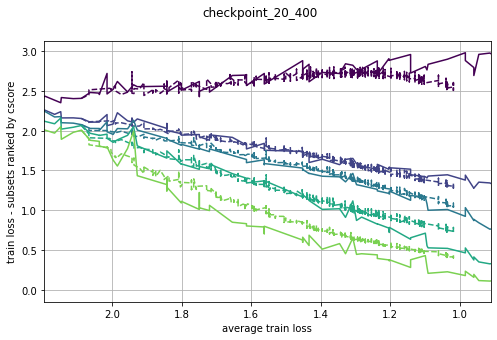

{'alpha': '10000.0', 'batch_size': '125', 'depth': '0', 'diff': '0.0', 'diff_type': 'random', 'epochs': '10000', 'fork': 'True', 'l2': '0.0', 'lr': '0.02', 'mom': '0.0', 'task': 'cifar10_resnet18', 'track_accs': 'True', 'width': '0'}
10000 274208.0598728657


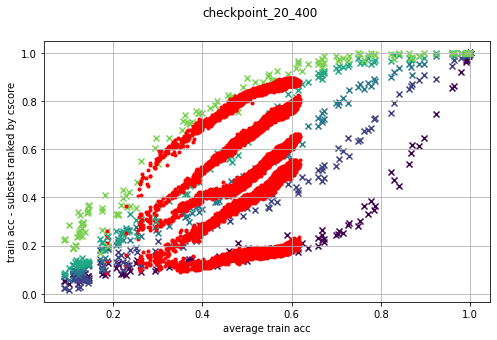

{'alpha': '10000.0', 'batch_size': '125', 'depth': '0', 'diff': '0.0', 'diff_type': 'random', 'epochs': '10000', 'fork': 'True', 'l2': '0.0', 'lr': '0.02', 'mom': '0.0', 'task': 'cifar10_resnet18', 'track_accs': 'True', 'width': '0'}
10000 274208.0598728657


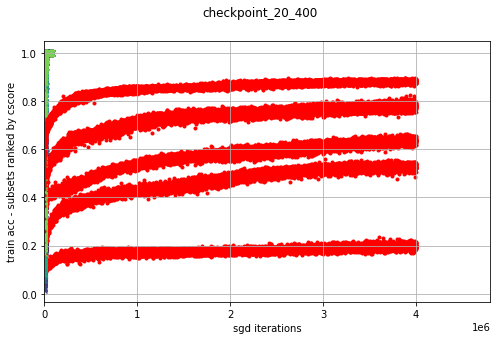

{'alpha': '10000.0', 'batch_size': '125', 'depth': '0', 'diff': '0.0', 'diff_type': 'random', 'epochs': '10000', 'fork': 'True', 'l2': '0.0', 'lr': '0.02', 'mom': '0.0', 'task': 'cifar10_resnet18', 'track_accs': 'True', 'width': '0'}
9999 271486.237937212


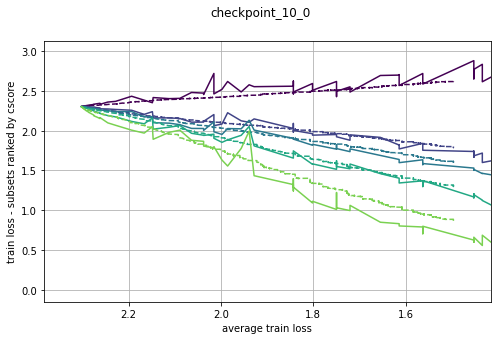

{'alpha': '10000.0', 'batch_size': '125', 'depth': '0', 'diff': '0.0', 'diff_type': 'random', 'epochs': '10000', 'fork': 'True', 'l2': '0.0', 'lr': '0.02', 'mom': '0.0', 'task': 'cifar10_resnet18', 'track_accs': 'True', 'width': '0'}
9999 271486.237937212


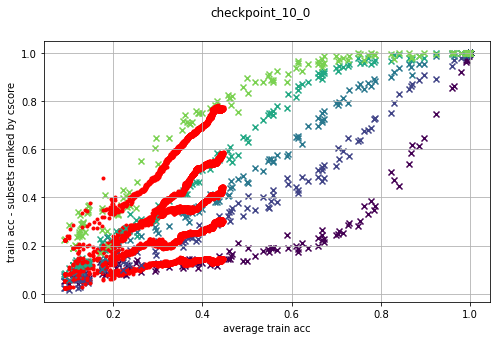

{'alpha': '10000.0', 'batch_size': '125', 'depth': '0', 'diff': '0.0', 'diff_type': 'random', 'epochs': '10000', 'fork': 'True', 'l2': '0.0', 'lr': '0.02', 'mom': '0.0', 'task': 'cifar10_resnet18', 'track_accs': 'True', 'width': '0'}
9999 271486.237937212


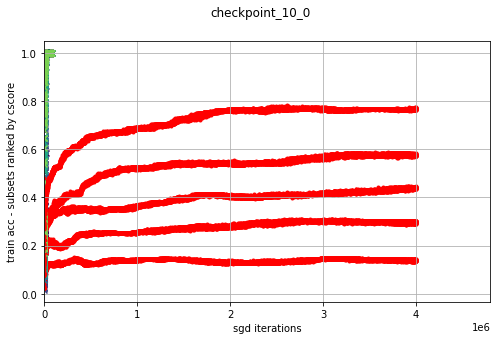

{'alpha': '10.0', 'batch_size': '125', 'depth': '0', 'diff': '0.0', 'diff_type': 'random', 'epochs': '30', 'fork': 'True', 'l2': '0.0', 'lr': '0.02', 'mom': '0.0', 'task': 'cifar10_resnet18', 'track_accs': 'True', 'width': '0'}
50 846.9946417808533


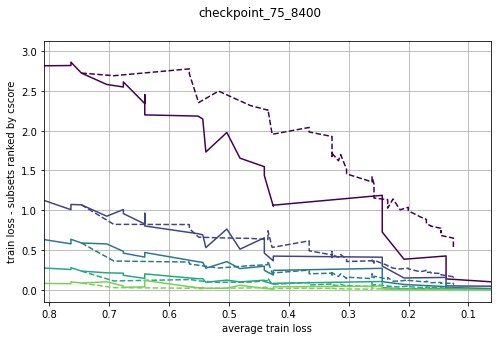

{'alpha': '10.0', 'batch_size': '125', 'depth': '0', 'diff': '0.0', 'diff_type': 'random', 'epochs': '30', 'fork': 'True', 'l2': '0.0', 'lr': '0.02', 'mom': '0.0', 'task': 'cifar10_resnet18', 'track_accs': 'True', 'width': '0'}
50 846.9946417808533


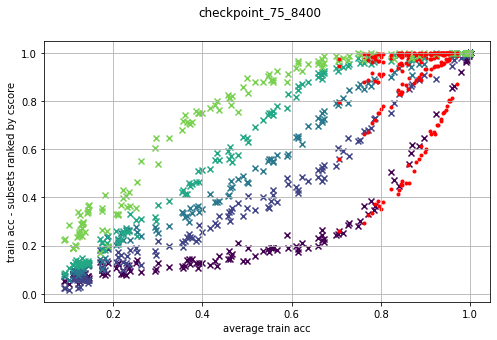

{'alpha': '10.0', 'batch_size': '125', 'depth': '0', 'diff': '0.0', 'diff_type': 'random', 'epochs': '30', 'fork': 'True', 'l2': '0.0', 'lr': '0.02', 'mom': '0.0', 'task': 'cifar10_resnet18', 'track_accs': 'True', 'width': '0'}
50 846.9946417808533


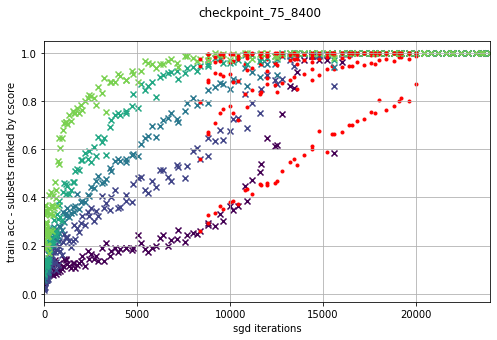

{'alpha': '10.0', 'batch_size': '125', 'depth': '0', 'diff': '0.0', 'diff_type': 'random', 'epochs': '30', 'fork': 'True', 'l2': '0.0', 'lr': '0.02', 'mom': '0.0', 'task': 'cifar10_resnet18', 'track_accs': 'True', 'width': '0'}
54 857.2880339622498


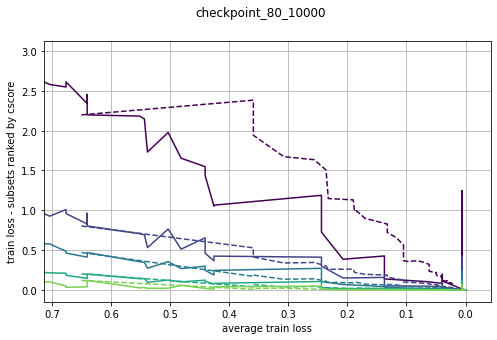

{'alpha': '10.0', 'batch_size': '125', 'depth': '0', 'diff': '0.0', 'diff_type': 'random', 'epochs': '30', 'fork': 'True', 'l2': '0.0', 'lr': '0.02', 'mom': '0.0', 'task': 'cifar10_resnet18', 'track_accs': 'True', 'width': '0'}
54 857.2880339622498


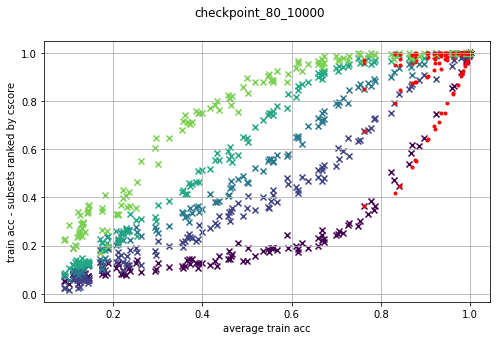

{'alpha': '10.0', 'batch_size': '125', 'depth': '0', 'diff': '0.0', 'diff_type': 'random', 'epochs': '30', 'fork': 'True', 'l2': '0.0', 'lr': '0.02', 'mom': '0.0', 'task': 'cifar10_resnet18', 'track_accs': 'True', 'width': '0'}
54 857.2880339622498


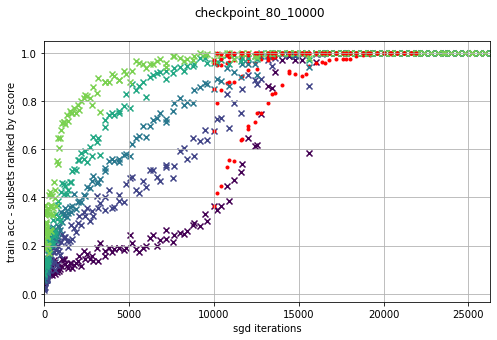

In [9]:
paths_fork = [
    'results/alpha=1.0,batch_size=125,depth=0,diff=0.0,diff_type=random,epochs=200,l2=0.0,lr=0.02,mom=0.0,task=cifar10_resnet18,track_accs=True,width=0/children/checkpoint_20_400/alpha=10000.0,batch_size=125,depth=0,diff=0.0,diff_type=random,epochs=10000,fork=True,l2=0.0,lr=0.02,mom=0.0,task=cifar10_resnet18,track_accs=True,width=0',
    'results/alpha=1.0,batch_size=125,depth=0,diff=0.0,diff_type=random,epochs=200,l2=0.0,lr=0.02,mom=0.0,task=cifar10_resnet18,track_accs=True,width=0/children/checkpoint_10_0/alpha=10000.0,batch_size=125,depth=0,diff=0.0,diff_type=random,epochs=10000,fork=True,l2=0.0,lr=0.02,mom=0.0,task=cifar10_resnet18,track_accs=True,width=0',
    'results/alpha=1.0,batch_size=125,depth=0,diff=0.0,diff_type=random,epochs=200,l2=0.0,lr=0.02,mom=0.0,task=cifar10_resnet18,track_accs=True,width=0/children/checkpoint_75_8400/alpha=10.0,batch_size=125,depth=0,diff=0.0,diff_type=random,epochs=30,fork=True,l2=0.0,lr=0.02,mom=0.0,task=cifar10_resnet18,track_accs=True,width=0',
    'results/alpha=1.0,batch_size=125,depth=0,diff=0.0,diff_type=random,epochs=200,l2=0.0,lr=0.02,mom=0.0,task=cifar10_resnet18,track_accs=True,width=0/children/checkpoint_80_10000/alpha=10.0,batch_size=125,depth=0,diff=0.0,diff_type=random,epochs=30,fork=True,l2=0.0,lr=0.02,mom=0.0,task=cifar10_resnet18,track_accs=True,width=0',
]

for path_fork in paths_fork:
    plot_vs_train_loss(path, path_fork)
    plot_vs_train_acc(path, path_fork)

    plot_vs_train_acc(path, path_fork, normalize=False)